<a href="https://colab.research.google.com/github/Kai0421/TensorFlowLearning/blob/main/BasicImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic image classification
[Keras Classification](https://www.tensorflow.org/tutorials/keras/classification)
using fashion MNIST dataset foor the machine lerning 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data();

4423680/4422102 [==============================] - 0s 0us/step


## Add layers to model and train model

In [2]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Create Model
model = tf.keras.models.Sequential()

# flatten the model
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

# Activivation Function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

epoch_cycles = 10
modelHistory = model.fit(x_train, y_train, epochs=epoch_cycles)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6465 - accuracy: 0.7701
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3603 - accuracy: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3190 - accuracy: 0.8820
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2735 - accuracy: 0.8974
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9027
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2448 - accuracy: 0.9067
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2308 - accuracy: 0.9126
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2218 - accuracy: 0.9161
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.209

## Visualize degree of Accuracy and loss reduction





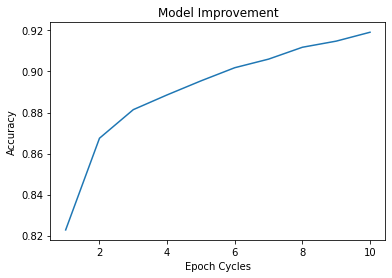

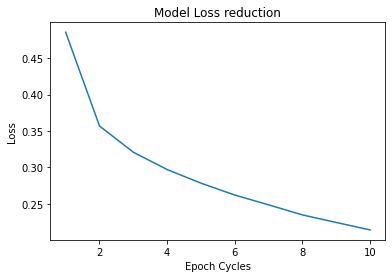

In [3]:
plt.plot(list(range(1,epoch_cycles+1)), modelHistory.history['accuracy'])
plt.title('Model Improvement')
plt.ylabel('Accuracy')
plt.xlabel('Epoch Cycles')
plt.show()

plt.plot(list(range(1,epoch_cycles+1)), modelHistory.history['loss'])
plt.title('Model Loss reduction')
plt.ylabel('Loss')
plt.xlabel('Epoch Cycles')
plt.show()

## Evaluate Model


In [4]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3312 - accuracy: 0.8845

Test accuracy: 0.8845000267028809


## Show prediction Results
Using mathplotlib to show predictions results 


In [7]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


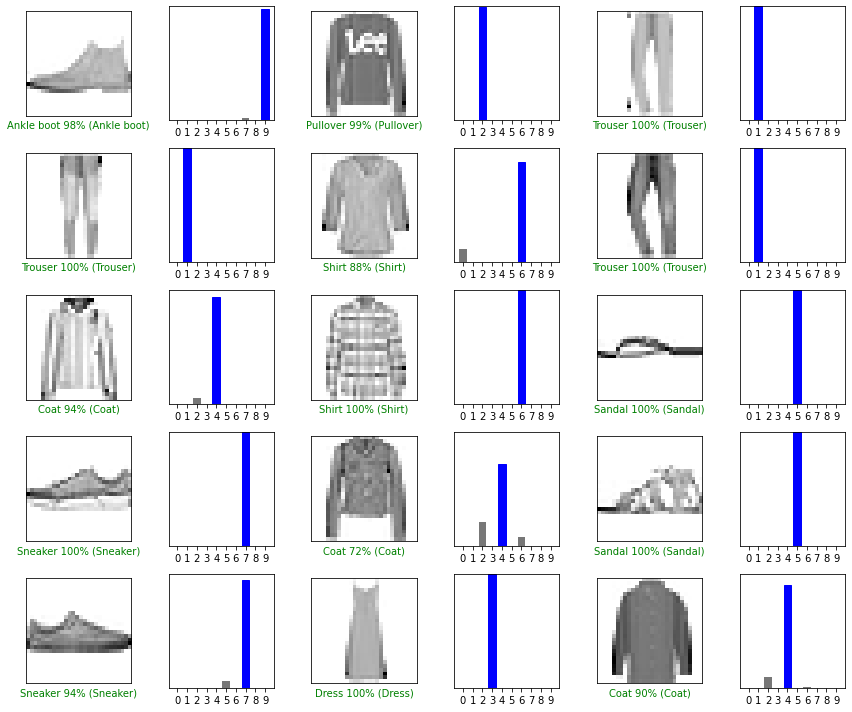

In [8]:
predictions = model.predict([x_test])

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()